In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor

In [3]:
X = np.load('initial_data/function_2/initial_inputs.npy')
Y = np.load('initial_data/function_2/initial_outputs.npy')

In [4]:
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# to optimize the acquisition function, we will simply use gridsearch over a space of 10.000 gridpoints
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)

X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        X_grid.append([x1[i], x2[j]])

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std = True)
ucb = mean + 1.96 * std

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print(next_query)

[0. 1.]


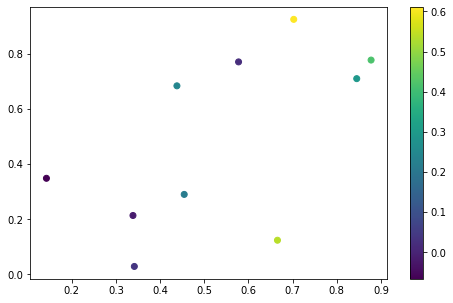

In [5]:
fig, ax = plt.subplots()
fig.set_figheight(5)
fig.set_figwidth(8)
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.colorbar()

In [8]:
#Max appears at X = [0.70263656, 0.9265642], therefore restrict viewing to this area
next_query_x1 = np.random.normal(0.70263656, scale = 0.01)
next_query_x2 = np.random.normal(0.9265642, scale = 0.01)
print('Next query Random: ', [round(next_query_x1,6), round(next_query_x2,6)])

# Using a restricted UCB
gpr = GaussianProcessRegressor()
gpr.fit(X, Y)

# to optimize the acquisition function, we will simply use gridsearch over a space of 10.000 gridpoints
x1 = np.linspace(0.7, 0.75, 100)
x2 = np.linspace(0.9, 0.95, 100)

X_grid = []
for i in range(len(x1)):
    for j in range(len(x2)):
        X_grid.append([x1[i], x2[j]])

X_grid = np.array(X_grid)
mean, std = gpr.predict(X_grid, return_std = True)
ucb = mean + 1.96 * std

idx_max = np.argmax(ucb)
next_query = X_grid[idx_max]
print('Next query UCB: ' + str(round(next_query[0],6)) + '-' + str(round(next_query[1],6)))

Next query Random:  [0.70169, 0.920255]
Next query UCB: 0.7-0.95
